## **Mir Ali Naqi Talpur  | Student ID: ST-125001  |Assignment A-3**

### **Importing libraries**

In [1]:
#Importing library and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import os
import time
import warnings
import mlflow
warnings.filterwarnings('ignore')

### **Loading Data**

In [2]:
# Reading data from 'cars.csv' file
df = pd.read_csv('dataset/cars.csv')

# Printing first 5 rows of the DataFrame
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [4]:
# Checking shape of the df
df.shape

(8128, 13)

In [5]:
# Checking descriptive statistics for the data
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
# Check Dtypes and missing values in the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
# Fetching all the column names from the df
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

### **Data Cleaning**

In [8]:
#Converting feature owner into numbers categories 1 through 5 using  dictionary and mapping function
cats = {"First Owner" : 1,
       "Second Owner" : 2,
       "Third Owner" : 3,
       "Fourth & Above Owner": 4,
       "Test Drive Car" : 5
}

df['owner'] = df['owner'].map(cats)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [9]:
#Removing all rows where fuel is either 'CNG' or 'LPG', using 'loc' and 'isin' methods
df = df.loc[~df['fuel'].isin(['CNG', 'LPG'])]

In [10]:
#Removing 'kmpl' from the column values using 'str.split'methods and slicing to extract only the numerical values
df['mileage'] = df['mileage'].str.split(' ').str[0]

#Now, using the 'astype' method to convert the resulting column into float 
df['mileage'] = df['mileage'].astype(float)

In [11]:
#Removing 'cc' from the feature 'engine'
df['engine'] = df['engine'].str.split(' ').str[0]

#Now, converting the 'engine' feature into float
df['engine'] = df['engine'].astype('float')

In [12]:
#Removing 'bhp' from the feature 'max_power'
df['max_power'] = df['max_power'].str.split(' ').str[0]

#Now, converting the 'engine' feature into float
df['max_power'] = df['max_power'].astype('float')

In [13]:
#keeping only the first word from the feature 'name'
df['name'] = df['name'].str.split(' ').str[0]

#Change the name of feature 'name' to 'brand'
df.rename(columns={'name':'brand'}, inplace=True)

In [14]:
#Dropping the feature 'torque' from the dataframe
df.drop('torque', axis=1, inplace=True)

In [15]:
"""
Removing  all rows where cars are 'Test Drive Cars'. Since number '5' in the feature 'owner' represents all such car,
we can filter out all rows where feature 'owner' has value '5'
"""

df = df[df['owner'] !=5]

In [16]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [17]:
# Check for duplicate rows
duplicates = df.duplicated()

# Display the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Optionally, show the duplicate rows
print("Duplicate rows:")
df[duplicates]

Number of duplicate rows: 1220
Duplicate rows:


,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
291,Hyundai,2017,450000,35000,Petrol,Individual,Manual,1,18.90,1197.0,82.00,5.0
296,Maruti,2012,330000,50000,Petrol,Individual,Manual,2,18.60,1197.0,85.80,5.0
370,Jaguar,2017,2625000,9000,Diesel,Dealer,Automatic,1,13.60,1999.0,177.00,5.0
371,Lexus,2019,5150000,20000,Petrol,Dealer,Automatic,1,22.37,2487.0,214.56,5.0
372,Jaguar,2017,3200000,45000,Diesel,Dealer,Automatic,1,19.33,1999.0,177.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7987,Renault,2018,1265000,12000,Diesel,Individual,Manual,1,20.37,1461.0,108.45,5.0
7988,Maruti,2019,1025000,32000,Diesel,Individual,Manual,1,28.09,1248.0,88.50,5.0
8117,Maruti,2015,625000,50000,Diesel,Individual,Manual,1,26.59,1248.0,74.00,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


**Handling duplicated rows**

In [18]:
#Removing any duplicated row
df = df.drop_duplicates()
df.shape

(6808, 12)

In [19]:
#checking for missing values
df.isnull().sum()

brand              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          201
engine           201
max_power        198
seats            201
dtype: int64

**Handling Missing values**

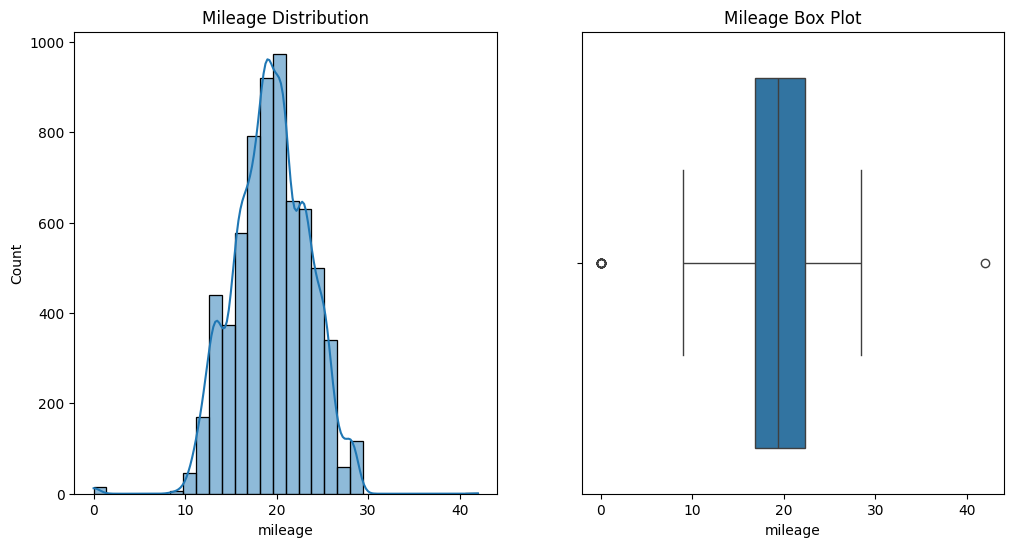

In [20]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['mileage'], bins=30, kde=True)
plt.title('Mileage Distribution')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['mileage'])
plt.title('Mileage Box Plot')

plt.show()

In [21]:
print(df['mileage'].describe())

count    6607.000000
mean       19.435396
std         4.012883
min         0.000000
25%        16.800000
50%        19.400000
75%        22.320000
max        42.000000
Name: mileage, dtype: float64


In [22]:
(df['mileage'] == 0).sum()

15

In [23]:
df['mileage'].isnull().sum()

201

In [24]:
df[df['mileage'] ==0]

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
644,Tata,2009,135000,28900,Petrol,Individual,Manual,2,0.0,1172.0,65.00,5.0
785,Hyundai,2009,120000,90000,Petrol,Individual,Manual,2,0.0,1086.0,62.00,5.0
1649,Hyundai,2008,105000,128000,Petrol,Individual,Manual,1,0.0,1086.0,62.00,5.0
1676,Mercedes-Benz,2011,1700000,110000,Diesel,Individual,Automatic,3,0.0,2987.0,165.00,5.0
2137,Land,2013,1650000,64788,Diesel,Dealer,Automatic,1,0.0,2179.0,115.00,5.0
2366,Hyundai,2010,110000,80000,Petrol,Individual,Manual,2,0.0,1086.0,62.10,5.0
2725,Hyundai,2013,184000,15000,Petrol,Individual,Manual,1,0.0,1086.0,62.10,5.0
5276,Hyundai,2008,175000,40000,Petrol,Individual,Manual,1,0.0,1086.0,62.00,5.0
5843,Volkswagen,2014,574000,28080,Petrol,Dealer,Automatic,1,0.0,1197.0,103.25,5.0
5846,Volkswagen,2014,575000,28100,Petrol,Dealer,Automatic,1,0.0,1197.0,103.25,5.0


In [25]:
df[df['mileage'].isnull()]

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
13,Maruti,2007,200000,80000,Petrol,Individual,Manual,2,NaN,NaN,NaN,NaN
31,Fiat,2003,70000,50000,Petrol,Individual,Manual,2,NaN,NaN,NaN,NaN
78,Tata,2003,50000,70000,Diesel,Individual,Manual,1,NaN,NaN,NaN,NaN
87,Maruti,2015,475000,78000,Diesel,Dealer,Manual,1,NaN,NaN,NaN,NaN
119,Maruti,2010,300000,120000,Diesel,Individual,Manual,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7740,Hyundai,2004,70000,70000,Petrol,Individual,Manual,2,NaN,NaN,NaN,NaN
7996,Hyundai,2000,140000,50000,Petrol,Individual,Manual,2,NaN,NaN,NaN,NaN
8009,Hyundai,2006,145000,80000,Petrol,Individual,Manual,2,NaN,NaN,NaN,NaN
8068,Ford,2017,580000,165000,Diesel,Individual,Manual,1,NaN,NaN,NaN,NaN


For the mileage column there are **201 null values**. Also, there are **15 rows with mileage 0**. So, its best to replace both the missing and 0 values with median.

In [26]:
# Imputing missing values with median
mileage_median = df['mileage'].median()
df['mileage'].fillna(mileage_median, inplace=True)

# Replacing zero values with
df['mileage'].replace(0, mileage_median, inplace=True)

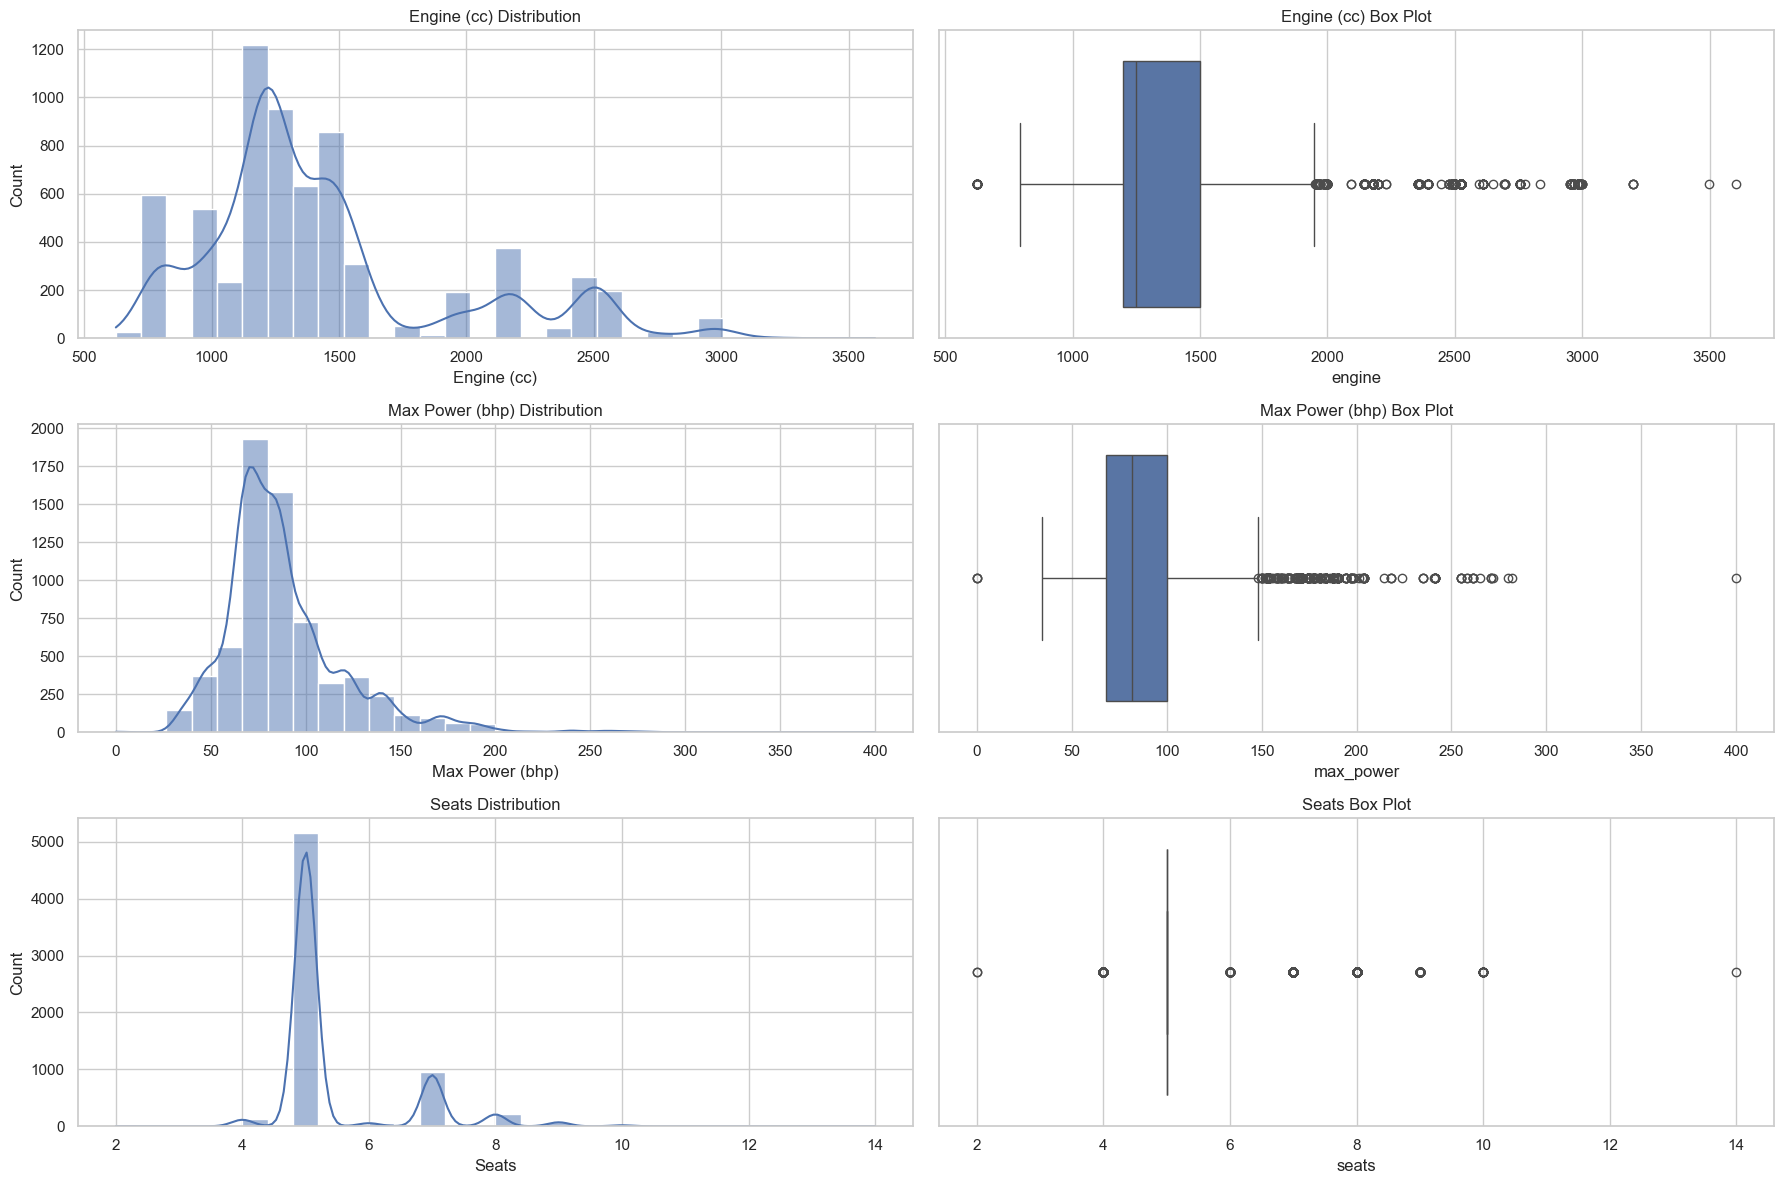

In [27]:
# Set the style for the plots
sns.set_theme(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(18, 12))

# 1. Histogram and Box Plot for Engine (cc)
plt.subplot(3, 2, 1)
sns.histplot(df['engine'], bins=30, kde=True)
plt.title('Engine (cc) Distribution')
plt.xlabel('Engine (cc)')

plt.subplot(3, 2, 2)
sns.boxplot(x=df['engine'])
plt.title('Engine (cc) Box Plot')

# 2. Histogram and Box Plot for Max Power (bhp)
plt.subplot(3, 2, 3)
sns.histplot(df['max_power'], bins=30, kde=True)
plt.title('Max Power (bhp) Distribution')
plt.xlabel('Max Power (bhp)')

plt.subplot(3, 2, 4)
sns.boxplot(x=df['max_power'])
plt.title('Max Power (bhp) Box Plot')

# 3. Histogram and Box Plot for Seats
plt.subplot(3, 2, 5)
sns.histplot(df['seats'], bins=30, kde=True)
plt.title('Seats Distribution')
plt.xlabel('Seats')

plt.subplot(3, 2, 6)
sns.boxplot(x=df['seats'])
plt.title('Seats Box Plot')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Engine size and Max_power** columns are showing right-skewed distributions, so its best to use median for imputation of both columns, since median is more robust to outliers.

**Seats column** has median of 5, and this would be an appropriate value for imputation, since most cars typically have around 5 seats.



In [28]:
print(df['engine'].describe())
print(df['max_power'].describe())
print(df['seats'].describe())

count    6607.000000
mean     1435.636295
std       494.531706
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1498.000000
max      3604.000000
Name: engine, dtype: float64
count    6610.000000
mean       88.045432
std        31.744343
min         0.000000
25%        68.000000
50%        81.860000
75%       100.000000
max       400.000000
Name: max_power, dtype: float64
count    6607.000000
mean        5.440139
std         0.988893
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        14.000000
Name: seats, dtype: float64


In [29]:
# Checking for max_power where value is 0
df[df['max_power'] == 0]

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
575,Maruti,2011,204999,97500,Petrol,Individual,Manual,1,19.4,NaN,0.0,NaN
1442,Maruti,2017,589000,41232,Diesel,Dealer,Manual,1,19.4,NaN,0.0,NaN
2549,Tata,2012,240000,70000,Diesel,Individual,Manual,1,19.4,NaN,0.0,NaN


In [30]:
# Impute missing values with the median
maxpower_median = df['max_power'].median()

df['engine'].fillna(df['engine'].median(), inplace=True)
df['max_power'].fillna(maxpower_median, inplace=True)
df['seats'].fillna(df['seats'].median(), inplace=True)

# Replacing max power value 0 with median too
df['max_power'].replace(0, maxpower_median, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6808 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          6808 non-null   object 
 1   year           6808 non-null   int64  
 2   selling_price  6808 non-null   int64  
 3   km_driven      6808 non-null   int64  
 4   fuel           6808 non-null   object 
 5   seller_type    6808 non-null   object 
 6   transmission   6808 non-null   object 
 7   owner          6808 non-null   int64  
 8   mileage        6808 non-null   float64
 9   engine         6808 non-null   float64
 10  max_power      6808 non-null   float64
 11  seats          6808 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 691.4+ KB


## Exploratory Data Analysis (EDA)

In [32]:
# Preparing data for EDA
# Columns to be plotted
continuous_cols = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']

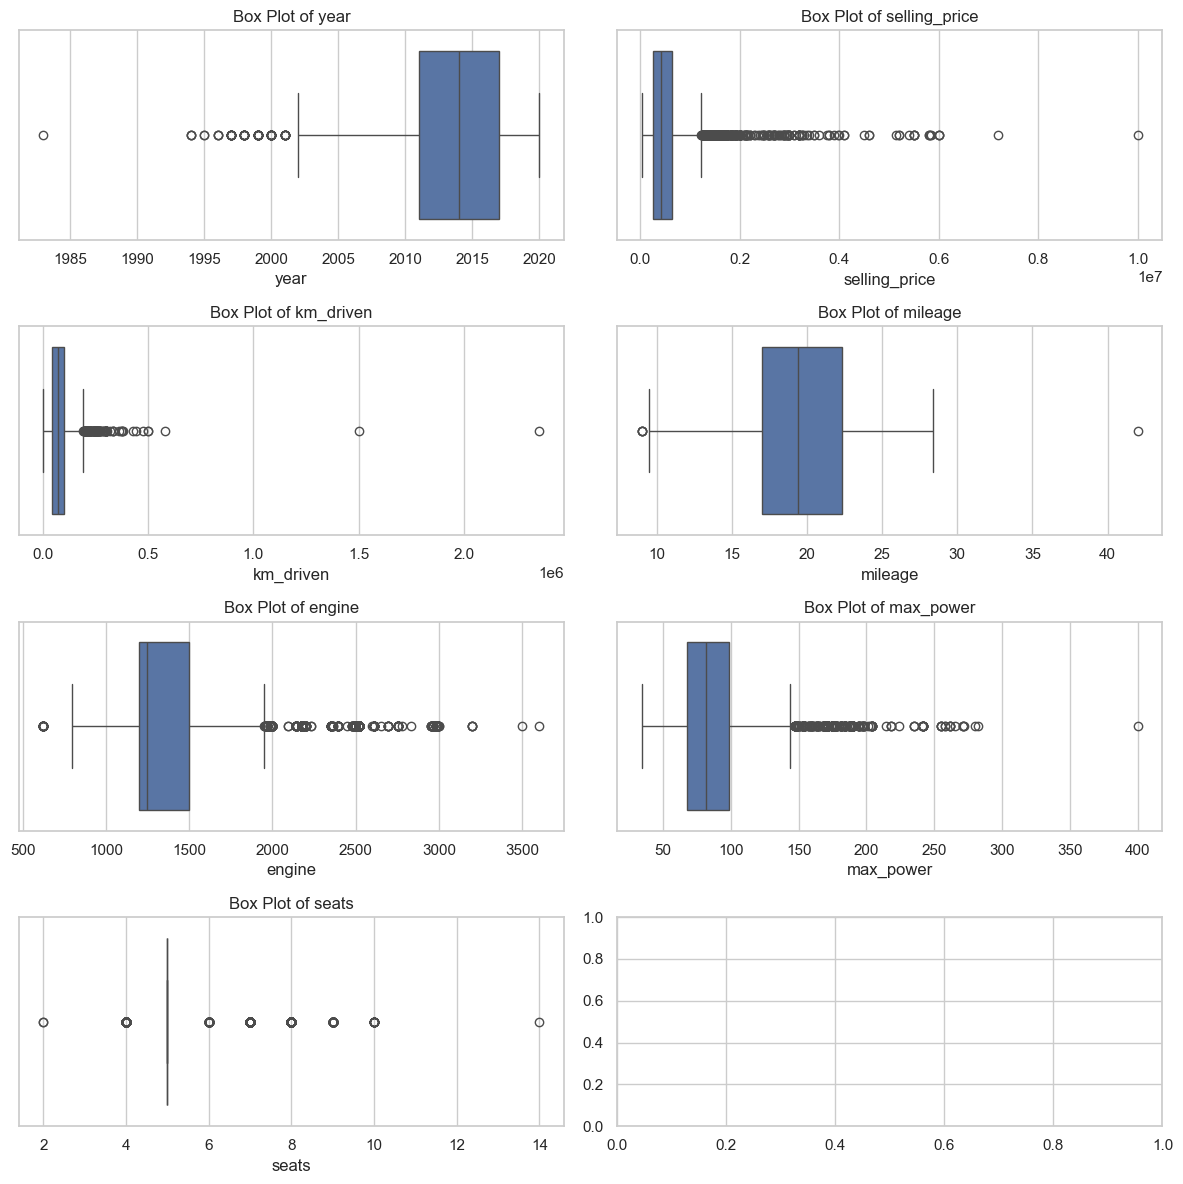

In [33]:
# Box plots for continuous variables using subplots
fig, axes = plt.subplots(nrows=len(continuous_cols)//2 + 1, ncols=2, figsize=(12, 12))
axes = axes.flatten()
for i, col in enumerate(continuous_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

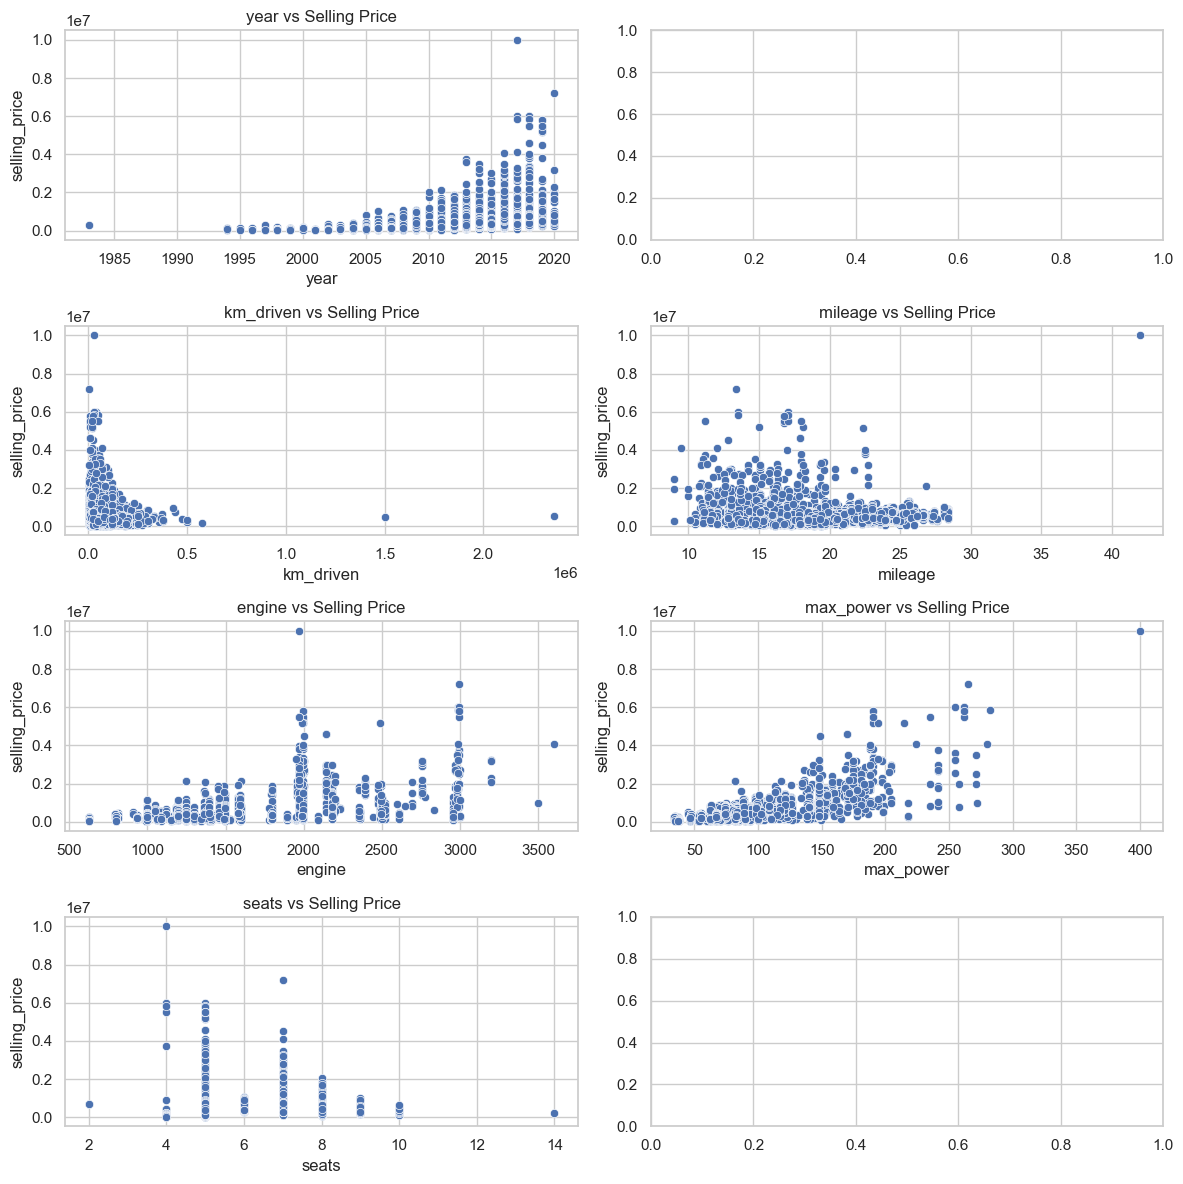

In [34]:
# Scatter plots for continuous variables against target variable 'selling_price' using subplots
fig, axes = plt.subplots(nrows=len(continuous_cols)//2 + 1, ncols=2, figsize=(12, 12))
axes = axes.flatten()
for i, col in enumerate(continuous_cols):
    if col != 'selling_price':  # Avoid plotting selling_price against itself
        sns.scatterplot(x=df[col], y=df['selling_price'], ax=axes[i])
        axes[i].set_title(f'{col} vs Selling Price')
plt.tight_layout()
plt.show()

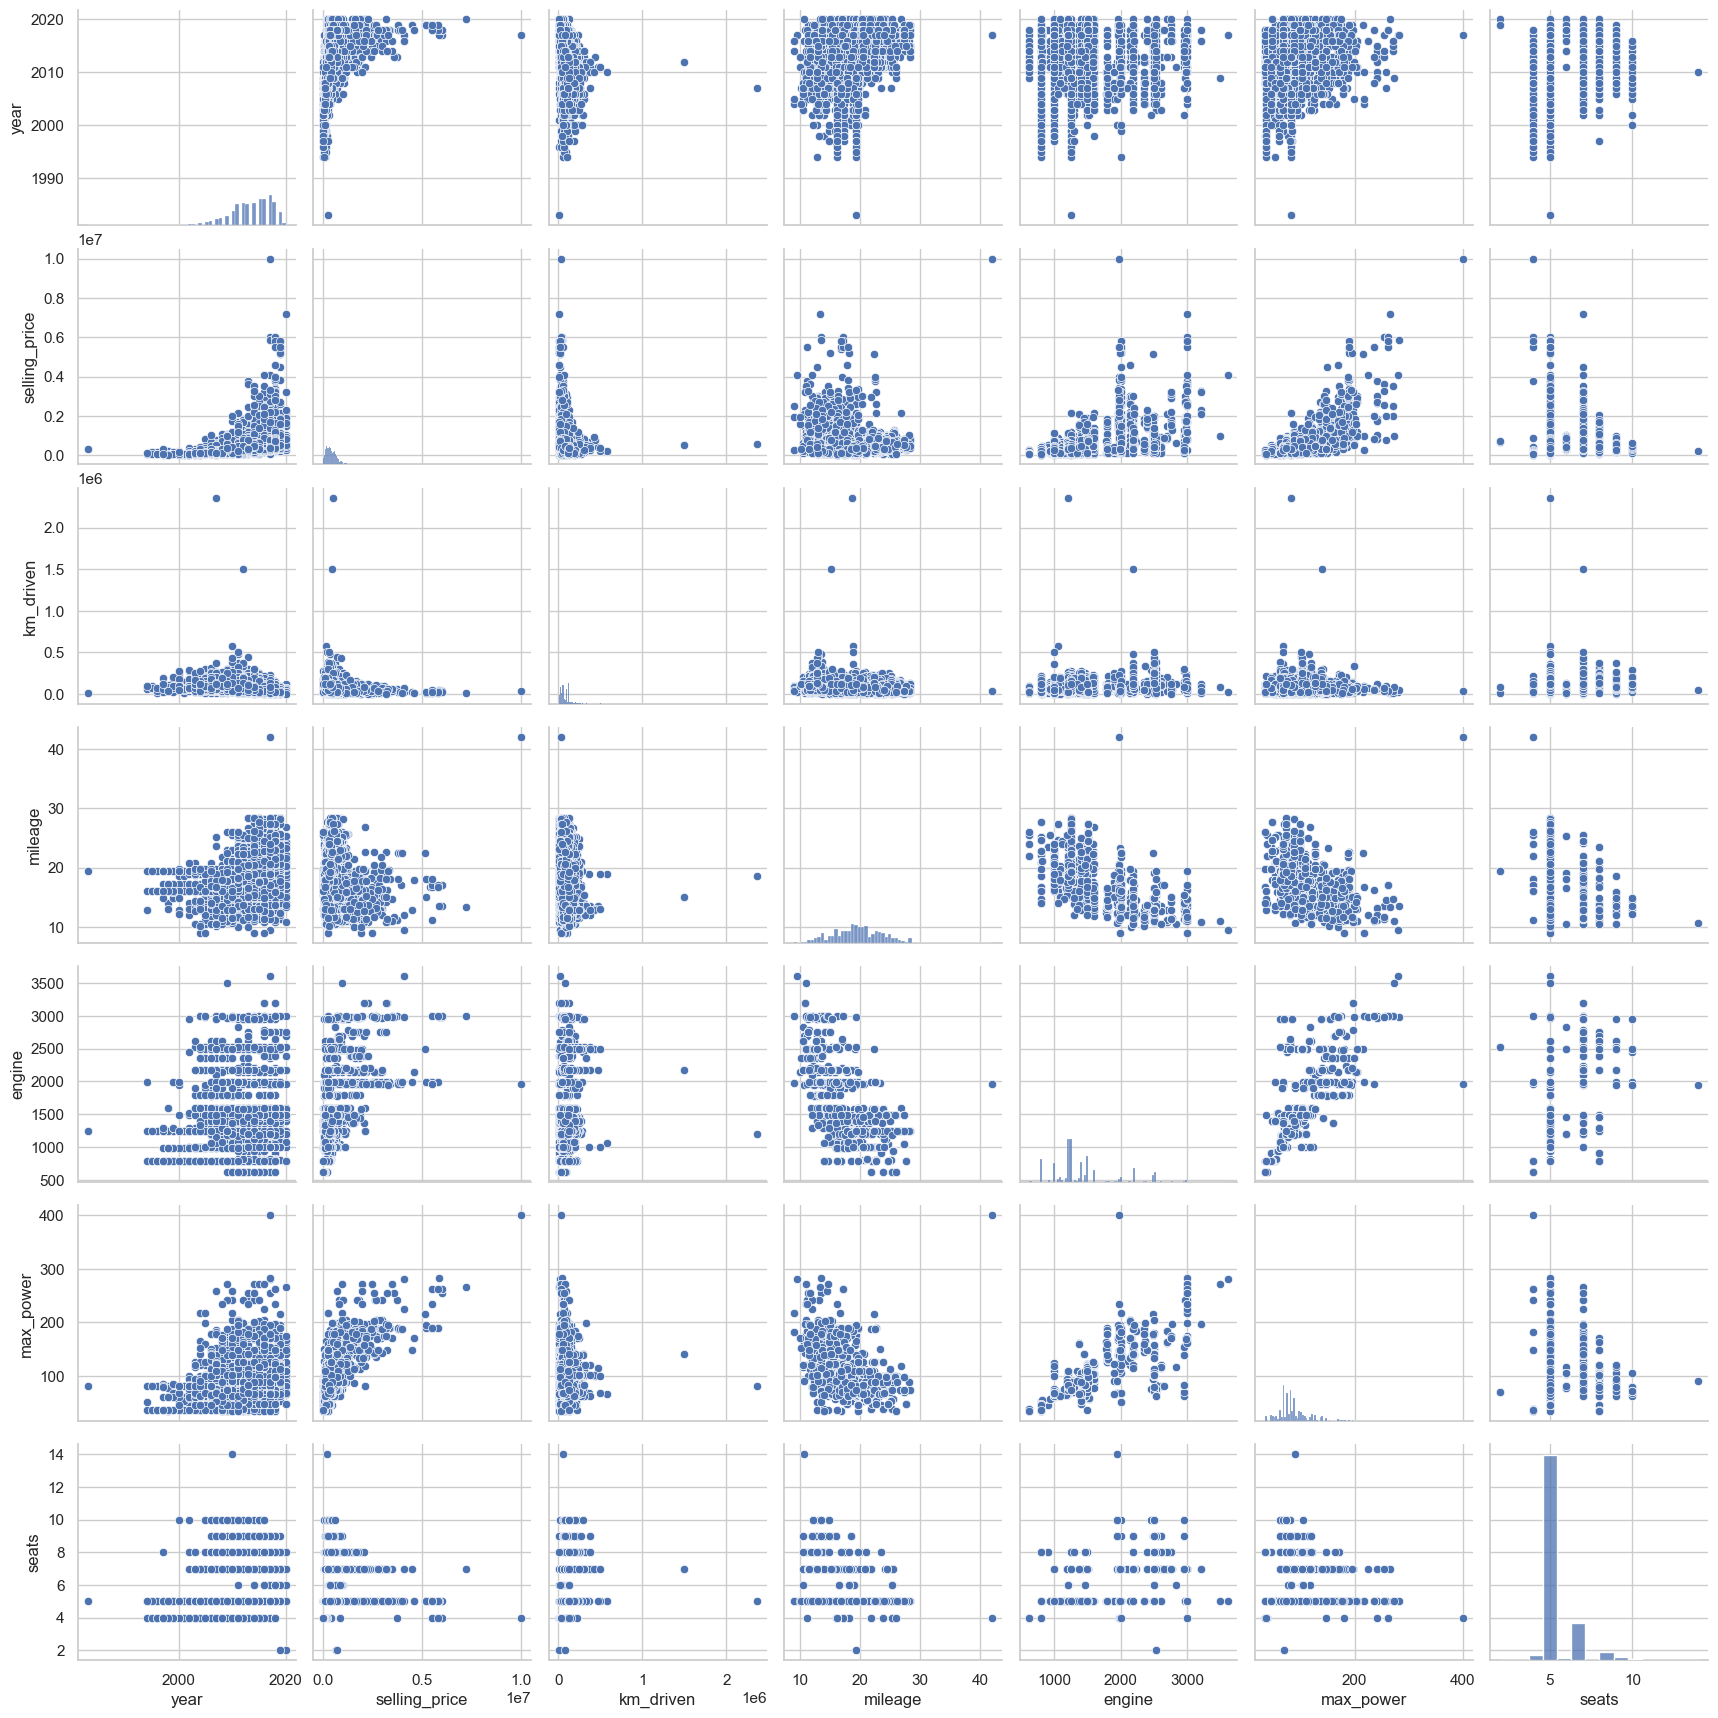

In [35]:
# Pairplot for all numerical columns to check relationships
sns.pairplot(df[continuous_cols])
plt.show()

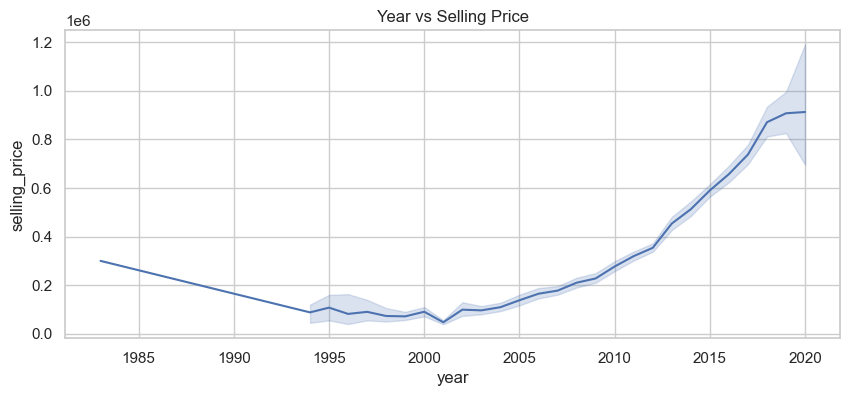

In [36]:
# Line plot for year vs selling_price to analyze trends over time
plt.figure(figsize=(10, 4))
sns.lineplot(x='year', y='selling_price', data=df)
plt.title('Year vs Selling Price')
plt.show()

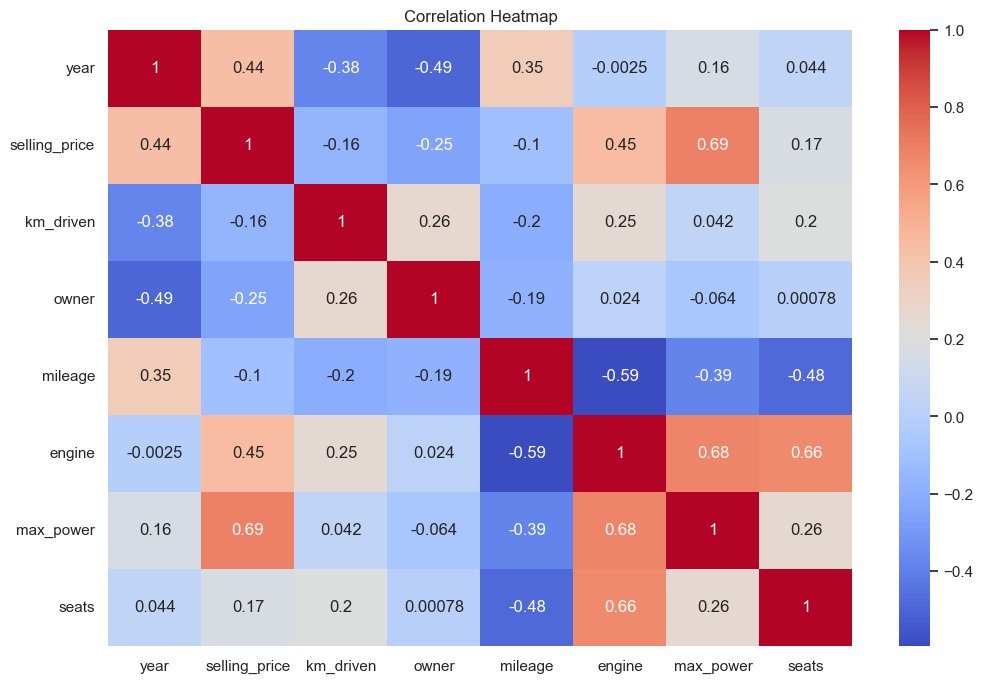

In [37]:
# Using correlation matrix to find strong factors to predict car prices, also checking whether certain features are too correlated.
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [38]:
# pd.options.display.float_format = '{:.2f}'.format
# df.describe()

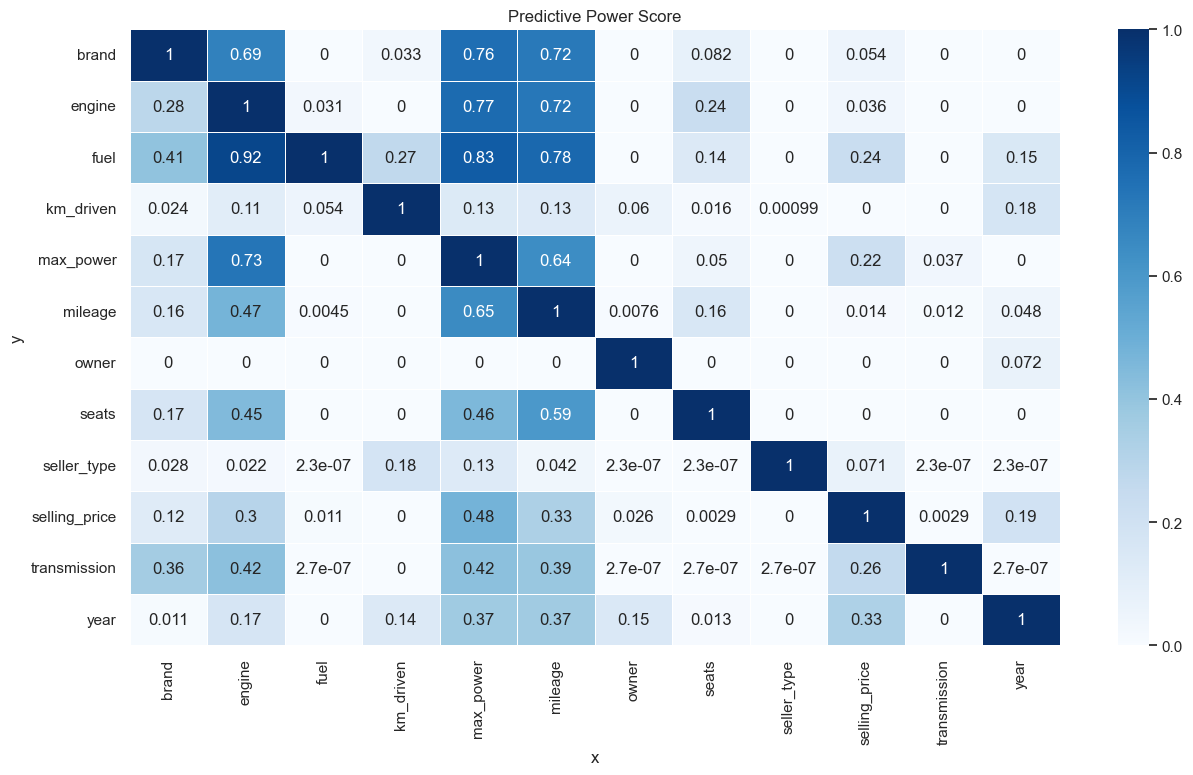

In [39]:
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.title('Predictive Power Score');

**Based on the ppscores we can conclude to drop rest of the features and keep only the features/columns 'engine', 'max_power', 'year' 'mileage',and 'owner'**
????????????

In [40]:
# Based on the ppscores we can conclude to drop rest of the features and
# keep only the feature 'engine', 'max_power', 'year' 'mileage',and 'owner'
important_features = ['year', 'engine', 'max_power', 'mileage', 'owner']

### Preprocessing Features

**Encoding features**

In [41]:
#Hot-encoding the features 'seller_type', 'transmission', 'fuel'
# df = pd.get_dummies(df, columns=['seller_type', 'transmission', 'fuel'], dtype=int)
# df.head()

In [42]:
df['selling_price'].describe()

count    6.808000e+03
mean     5.181454e+05
std      5.087438e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.099990e+05
75%      6.400000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

In [43]:
# Define custom bin ranges based on the statistics
bins = [29999, 150000, 300000, 600000, 10000000]  
labels = [0, 1, 2, 3]  # Labels for each bin; low range, lower-mid range, upper-mid range, high range

# Apply custom binning
df['selling_price_labels'] = pd.cut(df['selling_price'], bins=bins, labels=labels, include_lowest=True)

# Check the bin distribution
print(df['selling_price_labels'].value_counts())

2    2552
3    1863
1    1584
0     809
Name: selling_price_labels, dtype: int64


| Category           | Number of Cars | Range             |
|--------------------|----------------|-------------------|
| 0                  | 809            | Low Range         |
| 1                  | 1584           | Lower-Mid Range   |
| 2                  | 2552           | Upper-Mid Range   |
| 3                  | 1863           | High Range        |


## Feature Selection


### Train test Split

In [44]:
X = df[important_features]
y = df['selling_price_labels']
k = len(set(y))

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
y_train.shape

(5446,)

In [47]:
print(np.unique(y_train))

[0 1 2 3]


In [48]:
from sklearn.preprocessing import StandardScaler

scale_columns = ['year', 'engine', 'max_power', 'mileage']
scaler = StandardScaler()


X_train[scale_columns] = scaler.fit_transform(X_train[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])

# One-hot encoding y_train
y_train = pd.get_dummies(y_train)

In [49]:

X_train = X_train.to_numpy()
X_test  = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test  = y_test.to_numpy()

In [50]:
# Checking shapes of  X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5446, 5)
Shape of X_test:  (1362, 5)
Shape of y_train:  (5446, 4)
Shape of y_test:  (1362,)


## Modeling

In [56]:
os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'password'

# Set the tracking URI
mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th")

# Experiment name
experiment_name = "st125001-a3"

In [52]:
class LogisticRegression:    
    def __init__(self, regularization, k, n, method, alpha = 0.001, max_iter=5000):
        self.regularization = regularization
        self.k = int(k)
        self.n = int(n)
        self.alpha = alpha
        self.max_iter = max_iter
        self.W = None
        self.method = method
        self.losses = []
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        # Setting paramters for logging to mlflow
        params = {
            "reg": type(self).__name__,
            "method": self.method,
            "k": int(self.k),
            "n": int(self.n),
            "alpha": self.alpha,
            "max_iter": self.max_iter
        }      
        # mlflow.log_params(params=params)
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    # mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    # mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    # mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
      
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        
        if self.regularization:
            grad = self.softmax_grad(X, error) + self.regularization.derivation(self.W)
        else:
            grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):      
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()
        
    def accuracy(self, y_test, y_pred):
        correct_predictions = np.sum(y_test == y_pred)
        all_predictions = y_test.shape[0]
        return correct_predictions / all_predictions
    
    def precision(self, y_test, y_pred, c= 0):
        true_positives  = np.sum((y_test ==c) & (y_pred == c))
        false_positives = np.sum((y_test != c) & (y_pred == c))
        # Handle edge case: if there are no positive predictions for class `c` 
        # (i.e., true_positives + false_positives = 0), return precision as 0 to avoid division by zero.
        if true_positives + false_positives == 0:
            return 0
        else:
            return true_positives / (true_positives + false_positives)
        
    def recall(self, y_test, y_pred, c=0):
        true_positives = np.sum((y_test == c) & (y_pred == c))
        false_negatives = np.sum((y_test == c) & (y_pred != c))
        # Handle case where there are no true positives or false negatives (i.e., no actual instances of class c)
        if true_positives + false_negatives == 0:
            return 0
        else:
            return true_positives / (true_positives + false_negatives)
        
    def f1_score(self, y_test, y_pred, c=0):
        precision = self.precision(y_test, y_pred, c)
        recall = self.recall(y_test, y_pred, c)
        if precision + recall == 0:
            return 0
        else:
            return 2 * precision * recall / (precision + recall)
        
    def macro_precision(self, y_test, y_pred):
         precisions_list = [self.precision(y_test, y_pred, c) for c in range(self.k)]
         return np.sum(precisions_list) / 4
     
    def macro_recall(self, y_test, y_pred):
        recalls = [self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls) / self.k
     
    def macro_f1(self, y_test, y_pred):
        f1s = [self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s) / self.k
    
    def weighted_precision(self, y_test, y_pred):
        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        precisions = [class_counts[c] / len(y_test) * self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions)
    
    def weighted_recall(self, y_test, y_pred): 
        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        recalls = [class_counts[c] / len(y_test) * self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls)
    
    def weighted_f1(self, y_test, y_pred):
        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        f1s = [class_counts[c] / len(y_test) * self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s)
    
    def classification_report(self, y_test, y_pred):
        cols = ["precision", "recall", "f1-score"]
        idx = list(range(self.k)) + ["accuracy", "macro avg", "weighted avg"]

        report = [[round(self.precision(y_test, y_pred, c), 2),
                round(self.recall(y_test, y_pred, c), 2),
                round(self.f1_score(y_test, y_pred, c), 2)] for c in range(self.k)]

        report.append(["", "", round(self.accuracy(y_test, y_pred), 2)])

        report.append([round(self.macro_precision(y_test, y_pred), 2),
                    round(self.macro_recall(y_test, y_pred), 2),
                    round(self.macro_f1(y_test, y_pred), 2)])

        report.append([round(self.weighted_precision(y_test, y_pred), 2),
                    round(self.weighted_recall(y_test, y_pred), 2),
                    round(self.weighted_f1(y_test, y_pred), 2)])

        return pd.DataFrame(report, index=idx, columns=cols)

In [57]:
# Here we define various methods for logistic regression model, that help with the problem of overfitting
# It's important to reduce overfitting in order for the model to be able to predict correctly on the unseen/new data  
    
class RidgePenalty:    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta):                 #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):               # Computing derivative for the Ridge Penalty
        return self.l * 2 * theta
    

# Define classes for Ridge, and Normal (No Regularization) logistic regression
# Inheriting from  LogisticRegression Class, to add L2 regularization (Ridge Regression)
# in case of normal regression no regularization, which means not adding any penalty, also known as Ordinary Least Squares(OLS) Regression
        
class Ridge(LogisticRegression):    
    def __init__(self, l, k, n, method, alpha=0.001, max_iter=5000):
        regularization = RidgePenalty(l)
        super().__init__(regularization, k, n, method, alpha, max_iter)     

        
class Normal(LogisticRegression):  
    def __init__(self, k, n, method, alpha=0.001, max_iter=5000):
        super().__init__(regularization=None, k=k, n=n, method=method, alpha=alpha, max_iter=max_iter)

In [58]:
# A helper function to loop through classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

## Experimentation: Grid Search

In [59]:
"""
In the exprimenation step, we iterate though various settings of the regression models (regs), manipulating:
                        optimization strategies, 
                        polynomial features,
                        initialization method,
                        learning rates, and 
                        momentum.
We then train models on the training data (X_train, y_train), after which the evaluation of performance is carried out for each model using MSE and R2 score.
Following best prectices of the machine learning domain, we log the performace metrics and relevant model details using MLFLOW for analysis and comparison.

A brief introduction to Mlflow:
    It is an open-source platform designed to manage the machine learning lifecycle. It has tools for :
        Tracking: Logging experiment parameters, metrics, and artifacts (files etc.) to compare and analyze different model runs
        Project:  Packaging code and dependencies into reusbale projects for reproducibility
    Essentially, MLflow helps data scientists and MLOps teams streamline their workflow, improve collaboration, and ensure the reproducibility of their machine learning models.
"""

regs = ["Normal", "Ridge"]
methods = ["sto", "minibatch", "batch"]
learning_rates = [0.01, 0.001, 0.0001]
best_model = None
best_train_loss = float('inf')
best_accuracy = 0
best_reg_name = ""
best_method = ""

for reg in regs:    
    for method in methods:
        mlflow.start_run(run_name=f"reg-{reg}-method-{method}", nested=True)   
        for alpha in learning_rates:
            if reg == "Normal":            
                params = {
                    "k" : k,
                    "n" : X_train.shape[1],
                    "method": method,                            
                    "alpha": alpha,
                    "max_iter": 10000                            
                }
            else:
                params = {
                    "k" : k,
                    "n" : X_train.shape[1],
                    "method": method, 
                    "l": 0.1,                           
                    "alpha": alpha,
                    "max_iter": 10000                            
                }                 
            """
            mlflow.start_run:
                Starting new run with custom name, including method,learning rate, regularization, polynomial flag,
                momentum state, and initialization method. The run is nested within the current parent run (if any).
            
            """            
            with mlflow.start_run(run_name=f"reg-{reg}-method-{params['method']}-alpha-{params['alpha']}", nested=True):
                print("#"*20)
                print(reg, method)
                print(f"alpha: {alpha}")
                print("#"*20)
                
                model_class = str_to_class(reg)        # Converting the regs names string
                model = model_class(**params)    # Passing paramters to the model
                model.fit(X_train,  y_train)     # Fitting the model using the data from train_test_split method
                
                # Generate predicted values for y (target variable)
                yhat = model.predict(X_test)             
                accuracy = model.accuracy(y_test, yhat)
                mlflow.log_metric(key="accuracy", value=accuracy)
            
                for c in range(k):
                    f1 = model.f1_score(y_test, yhat, c)
                    precision = model.precision(y_test, yhat, c)
                    recall = model.recall(y_test, yhat, c)
                    mlflow.log_metric(key=f"class_{c}_f1", value=f1)
                    mlflow.log_metric(key=f"class_{c}_recall", value=recall)
                    mlflow.log_metric(key=f"class_{c}_precision", value=precision)
            
                # Final training loss
                final_train_loss = model.losses[-1]
                final_accuracy = model.accuracy(y_test, yhat)
                print(f"Final Training Loss: {final_train_loss}")            
            
            # Comparing training losses
                if final_train_loss < best_train_loss:
                    best_train_loss = final_train_loss
                    best_model = model
                    best_reg_name = reg
                    best_method = method
                
            # Comparing accuracy
                if final_accuracy > best_accuracy:
                    best_accuracy = final_accuracy
                    best_model = model
                    best_reg_name = reg
                    best_method = method            
                
            
            model_signature = mlflow.models.infer_signature(X_train, model.predict(X_train))     # Using infer_signature to capture schema of input and output data of the model
            mlflow.sklearn.log_model(model, artifact_path='model', signature=model_signature)    # Logging the model signature generated from model_signature
    mlflow.end_run() # End the nested run
mlflow.end_run() # End the main run

2024/10/06 11:30:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-sto-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/981b9de7d587439f9f392bdf1de812d5.
2024/10/06 11:30:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.


####################
Normal sto
alpha: 0.01
####################
Loss at iteration 0 2.072011776221009
Loss at iteration 500 1.419460921928757
Loss at iteration 1000 1.0095415804877348
Loss at iteration 1500 1.1503845695714305
Loss at iteration 2000 0.08657249082126063
Loss at iteration 2500 1.2731462960357864
Loss at iteration 3000 0.8781033239850037
Loss at iteration 3500 0.015700519215530173
Loss at iteration 4000 0.971426926335319
Loss at iteration 4500 0.7716363254850791
Loss at iteration 5000 0.32948703305460525
Loss at iteration 5500 0.4442240675849264
Loss at iteration 6000 0.9158082798808022
Loss at iteration 6500 0.5284424985396451
Loss at iteration 7000 1.1431739173116442
Loss at iteration 7500 0.6978202428812019
Loss at iteration 8000 0.9728255165226702
Loss at iteration 8500 0.8187148654949657
Loss at iteration 9000 0.16839391154589933
Loss at iteration 9500 0.7675396274337188
time taken: 0.5885143280029297
Final Training Loss: 0.05662458654463493


2024/10/06 11:30:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-sto-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/ac7b7e0bb7b44799a569a05b92f88289.
2024/10/06 11:30:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.


####################
Normal sto
alpha: 0.001
####################
Loss at iteration 0 1.2298188960394907
Loss at iteration 500 1.5898991910419473
Loss at iteration 1000 1.076304145768922
Loss at iteration 1500 2.2064004160291444
Loss at iteration 2000 1.084474168618547
Loss at iteration 2500 1.605156314611098
Loss at iteration 3000 1.1552471392206967
Loss at iteration 3500 1.483766209823387
Loss at iteration 4000 0.9235719231954207
Loss at iteration 4500 1.0112366635661962
Loss at iteration 5000 0.8712564488343472
Loss at iteration 5500 1.1430932468584611
Loss at iteration 6000 1.0132480449187515
Loss at iteration 6500 1.021213301996592
Loss at iteration 7000 1.032154463392505
Loss at iteration 7500 0.019840374882879902
Loss at iteration 8000 1.1019678972482836
Loss at iteration 8500 0.8525504916742459
Loss at iteration 9000 0.6681707166960237
Loss at iteration 9500 0.8794271947982054
time taken: 0.5947871208190918
Final Training Loss: 0.9969881683484663


2024/10/06 11:30:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-sto-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/59557b2eb3a94feebc43f29ac533e727.
2024/10/06 11:30:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.


####################
Normal sto
alpha: 0.0001
####################
Loss at iteration 0 2.134965745283037
Loss at iteration 500 2.165586388960076
Loss at iteration 1000 2.2600635828550377
Loss at iteration 1500 1.6933263008492212
Loss at iteration 2000 1.0027675906578937
Loss at iteration 2500 1.3143464619432237
Loss at iteration 3000 1.7597603849353045
Loss at iteration 3500 1.2525647123715886
Loss at iteration 4000 1.9916914287792926
Loss at iteration 4500 1.1299653550349975
Loss at iteration 5000 1.303527500037186
Loss at iteration 5500 1.6720058468577825
Loss at iteration 6000 1.6582219514624192
Loss at iteration 6500 1.1392962556797033
Loss at iteration 7000 2.1046118538280587
Loss at iteration 7500 1.9751439922464638
Loss at iteration 8000 1.7559438692070763
Loss at iteration 8500 1.7801919832812243
Loss at iteration 9000 1.9029132228092644
Loss at iteration 9500 1.232003649093574
time taken: 0.654949426651001
Final Training Loss: 1.3756592310838889


2024/10/06 11:30:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-minibatch-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/725446cacb3e4849bbaf42458da5bc2e.
2024/10/06 11:30:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.


####################
Normal minibatch
alpha: 0.01
####################
Loss at iteration 0 1.4420322693988437
Loss at iteration 500 4.366452419455145
Loss at iteration 1000 3.7845487189878524
Loss at iteration 1500 6.889821273747483
Loss at iteration 2000 4.370487843277491
Loss at iteration 2500 6.820607276974611
Loss at iteration 3000 5.127476586663625
Loss at iteration 3500 2.4902885625853592
Loss at iteration 4000 7.303085307640673
Loss at iteration 4500 2.797102813693112
Loss at iteration 5000 3.428066926183078
Loss at iteration 5500 2.1225391852963464
Loss at iteration 6000 5.5336465173528895
Loss at iteration 6500 1.677954595423762
Loss at iteration 7000 2.645988746159553
Loss at iteration 7500 4.563880463158008
Loss at iteration 8000 5.564019158449921
Loss at iteration 8500 4.777704457874392
Loss at iteration 9000 3.5184781195411925
Loss at iteration 9500 6.875122779461829
time taken: 2.928797721862793
Final Training Loss: 2.3165251286711994


2024/10/06 11:30:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-minibatch-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/e55331af16e9487ea6ca037c5a9cf004.
2024/10/06 11:30:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.


####################
Normal minibatch
alpha: 0.001
####################
Loss at iteration 0 1.7486165976220636
Loss at iteration 500 0.748590389260829
Loss at iteration 1000 0.7360280683232485
Loss at iteration 1500 0.6518971256798314
Loss at iteration 2000 0.7556249532847911
Loss at iteration 2500 0.7373987712489798
Loss at iteration 3000 0.7587473973621339
Loss at iteration 3500 0.762381258766234
Loss at iteration 4000 0.6018017873836036
Loss at iteration 4500 0.7609108973096994
Loss at iteration 5000 0.6928596661479648
Loss at iteration 5500 0.7600271868242331
Loss at iteration 6000 0.7121070914920286
Loss at iteration 6500 0.7526145644180644
Loss at iteration 7000 0.6993395521214469
Loss at iteration 7500 0.7067638562823665
Loss at iteration 8000 0.7439855924911895
Loss at iteration 8500 0.7007796405273566
Loss at iteration 9000 0.7417353222481522
Loss at iteration 9500 0.7532095773975662
time taken: 2.2949814796447754
Final Training Loss: 0.7583682317384964


2024/10/06 11:30:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-minibatch-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/07557911b5c44eec9d24945ca18f4030.


####################
Normal minibatch
alpha: 0.0001
####################


2024/10/06 11:30:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.


Loss at iteration 0 1.6444527607878776
Loss at iteration 500 0.6954184521892558
Loss at iteration 1000 0.7578715181834124
Loss at iteration 1500 0.75532461806513
Loss at iteration 2000 0.7314597472537858
Loss at iteration 2500 0.7601780697706373
Loss at iteration 3000 0.7587535703068787
Loss at iteration 3500 0.6891413266736106
Loss at iteration 4000 0.6682874018634395
Loss at iteration 4500 0.7414205680725396
Loss at iteration 5000 0.7656170861298089
Loss at iteration 5500 0.7644242252635183
Loss at iteration 6000 0.7412359764656838
Loss at iteration 6500 0.6747546769418309
Loss at iteration 7000 0.7477639583305628
Loss at iteration 7500 0.7668710450328194
Loss at iteration 8000 0.7367415327545818
Loss at iteration 8500 0.7360277997332338
Loss at iteration 9000 0.7628392153024554
Loss at iteration 9500 0.7607551363009816
time taken: 2.45294189453125
Final Training Loss: 0.5866529057496463


2024/10/06 11:31:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-batch-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/58460c4fe5c5456e8691278c781ea825.


####################
Normal batch
alpha: 0.01
####################


2024/10/06 11:31:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.


Loss at iteration 0 1.5595936724865327
Loss at iteration 500 22.939950045077346
Loss at iteration 1000 8.327869064395962
Loss at iteration 1500 12.782441230987716
Loss at iteration 2000 7.621282183405925
Loss at iteration 2500 20.792284273670635
Loss at iteration 3000 21.62664672408718
Loss at iteration 3500 8.913350715840915
Loss at iteration 4000 11.756305063550462
Loss at iteration 4500 16.857053170763372
Loss at iteration 5000 13.57763915093457
Loss at iteration 5500 7.031883862241177
Loss at iteration 6000 10.981930074969624
Loss at iteration 6500 20.546394945726465
Loss at iteration 7000 17.317470862224944
Loss at iteration 7500 12.73321959620491
Loss at iteration 8000 16.95226547955657
Loss at iteration 8500 12.543058693740159
Loss at iteration 9000 23.1979223818284
Loss at iteration 9500 14.834804392124736
time taken: 22.214696645736694
Final Training Loss: 5.68353053400375


2024/10/06 11:31:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-batch-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/ee014f7f79ae4ec0a125416fea98973e.
2024/10/06 11:31:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.


####################
Normal batch
alpha: 0.001
####################
Loss at iteration 0 1.76619361701174
Loss at iteration 500 1.1953415930470457
Loss at iteration 1000 1.1953419342346168
Loss at iteration 1500 1.1953419342368596
Loss at iteration 2000 1.1953419342368592
Loss at iteration 2500 1.19534193423686
Loss at iteration 3000 1.1953419342368596
Loss at iteration 3500 1.1953419342368594
Loss at iteration 4000 1.195341934236861
Loss at iteration 4500 1.195341934236861
Loss at iteration 5000 1.1953419342368596
Loss at iteration 5500 1.1953419342368596
Loss at iteration 6000 1.1953419342368596
Loss at iteration 6500 1.1953419342368592
Loss at iteration 7000 1.1953419342368596
Loss at iteration 7500 1.1953419342368592
Loss at iteration 8000 1.1953419342368587
Loss at iteration 8500 1.1953419342368583
Loss at iteration 9000 1.1953419342368592
Loss at iteration 9500 1.19534193423686
time taken: 8.812449932098389
Final Training Loss: 1.7408601084590813


2024/10/06 11:31:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-batch-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/799e88872a4d4094879dbb2d91e5f1f8.
2024/10/06 11:31:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.


####################
Normal batch
alpha: 0.0001
####################
Loss at iteration 0 1.6878670311291295
Loss at iteration 500 0.7483889350415214
Loss at iteration 1000 0.7482779161949897
Loss at iteration 1500 0.7482775013973347
Loss at iteration 2000 0.748277499747614
Loss at iteration 2500 0.7482774997410262
Loss at iteration 3000 0.7482774997409998
Loss at iteration 3500 0.7482774997409998
Loss at iteration 4000 0.7482774997409997
Loss at iteration 4500 0.7482774997409998
Loss at iteration 5000 0.7482774997409998
Loss at iteration 5500 0.7482774997409998
Loss at iteration 6000 0.7482774997409998
Loss at iteration 6500 0.7482774997409998
Loss at iteration 7000 0.7482774997409998
Loss at iteration 7500 0.7482774997409998
Loss at iteration 8000 0.7482774997409998
Loss at iteration 8500 0.7482774997409998
Loss at iteration 9000 0.7482774997409998
Loss at iteration 9500 0.7482774997409998
time taken: 13.507727146148682
Final Training Loss: 0.7482774997409998


2024/10/06 11:32:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-batch at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/4c3f6ed3cd4e44b58ee31efb8cc87dbd.
2024/10/06 11:32:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.
2024/10/06 11:32:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-sto-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/88e900a073c14e488936a96da17b22ec.


####################
Ridge sto
alpha: 0.01
####################


2024/10/06 11:32:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.


Loss at iteration 0 1.370966464375138
Loss at iteration 500 0.8972762388672174
Loss at iteration 1000 0.9026591012163973
Loss at iteration 1500 0.6905433978134308
Loss at iteration 2000 1.1081302422906456
Loss at iteration 2500 1.3850837298016616
Loss at iteration 3000 0.9091164841434243
Loss at iteration 3500 1.1695077924579136
Loss at iteration 4000 1.5009789161491385
Loss at iteration 4500 0.44141707769823746
Loss at iteration 5000 0.6675962123381086
Loss at iteration 5500 0.9471830240618402
Loss at iteration 6000 1.0488742604267054
Loss at iteration 6500 0.7699535100375784
Loss at iteration 7000 1.088543333121548
Loss at iteration 7500 1.1244854645533153
Loss at iteration 8000 1.0904820365346175
Loss at iteration 8500 0.27173373699346937
Loss at iteration 9000 0.27769596488014725
Loss at iteration 9500 0.9142086625132592
time taken: 1.862217903137207
Final Training Loss: 1.258631928699987


2024/10/06 11:32:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-sto-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/dbb58fff7b98436dbbb84455a8233793.
2024/10/06 11:32:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.


####################
Ridge sto
alpha: 0.001
####################
Loss at iteration 0 1.6947673895631459
Loss at iteration 500 1.345232146998935
Loss at iteration 1000 0.99190578644275
Loss at iteration 1500 1.1016829071141063
Loss at iteration 2000 1.1465745560485978
Loss at iteration 2500 1.0706046884307339
Loss at iteration 3000 0.9107861583499612
Loss at iteration 3500 1.2172384747159897
Loss at iteration 4000 1.2428833917795457
Loss at iteration 4500 1.0574666307786156
Loss at iteration 5000 0.7685859180396657
Loss at iteration 5500 0.9806701519321489
Loss at iteration 6000 0.8669126092511134
Loss at iteration 6500 1.1864006903507565
Loss at iteration 7000 0.9943229551681687
Loss at iteration 7500 1.2055244636708515
Loss at iteration 8000 1.2219053156368953
Loss at iteration 8500 0.9991945434239075
Loss at iteration 9000 1.2256634284402481
Loss at iteration 9500 1.2274655482803487
time taken: 1.501244306564331
Final Training Loss: 1.0580506451902365


2024/10/06 11:32:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-sto-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/42293563641443318ab01a3f5f746b21.


####################
Ridge sto
alpha: 0.0001
####################


2024/10/06 11:32:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.


Loss at iteration 0 1.1328823707425946
Loss at iteration 500 1.1941281213798305
Loss at iteration 1000 1.3225410832198525
Loss at iteration 1500 1.002881045618713
Loss at iteration 2000 1.7249353170658739
Loss at iteration 2500 2.4163699587033616
Loss at iteration 3000 0.8040919738724358
Loss at iteration 3500 1.2542938265442738
Loss at iteration 4000 1.6937410995529996
Loss at iteration 4500 1.7938211729750395
Loss at iteration 5000 1.8541601155409804
Loss at iteration 5500 1.5021226560208178
Loss at iteration 6000 2.2393222626563136
Loss at iteration 6500 1.5245064186389428
Loss at iteration 7000 1.6703595501484334
Loss at iteration 7500 1.5818449589371772
Loss at iteration 8000 0.47640142904327326
Loss at iteration 8500 1.1537132431227723
Loss at iteration 9000 0.8763578098689122
Loss at iteration 9500 1.4487219821735255
time taken: 0.529219388961792
Final Training Loss: 1.0413536376961336


2024/10/06 11:32:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-minibatch-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/990f266bffe449a38b5fdd1330b5ca75.
2024/10/06 11:32:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.


####################
Ridge minibatch
alpha: 0.01
####################
Loss at iteration 0 1.5049629669801088
Loss at iteration 500 1.6476858433470458
Loss at iteration 1000 3.0975098628911626
Loss at iteration 1500 4.786893719888083
Loss at iteration 2000 6.75177148104298
Loss at iteration 2500 2.0857328259430914
Loss at iteration 3000 6.266325225707101
Loss at iteration 3500 2.0256096474348806
Loss at iteration 4000 1.2434938085987266
Loss at iteration 4500 4.513952389466372
Loss at iteration 5000 0.7523156414980423
Loss at iteration 5500 2.854722584173745
Loss at iteration 6000 5.582955143794049
Loss at iteration 6500 4.9719482663065815
Loss at iteration 7000 3.217410599050813
Loss at iteration 7500 2.7090390580088455
Loss at iteration 8000 3.7585937835800887
Loss at iteration 8500 4.830105813170388
Loss at iteration 9000 5.3602004408586925
Loss at iteration 9500 6.782878045157866
time taken: 3.0281102657318115
Final Training Loss: 6.037760258785378


2024/10/06 11:33:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-minibatch-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/652d96451cd74556a1f53ee2b47a154e.
2024/10/06 11:33:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.


####################
Ridge minibatch
alpha: 0.001
####################
Loss at iteration 0 1.529677651185571
Loss at iteration 500 0.671898779753414
Loss at iteration 1000 0.7545389562708618
Loss at iteration 1500 0.7061012407304396
Loss at iteration 2000 0.7210869683240443
Loss at iteration 2500 0.6727576303955274
Loss at iteration 3000 0.7291081967199143
Loss at iteration 3500 0.7610187759036245
Loss at iteration 4000 0.734637246261103
Loss at iteration 4500 0.7081638475007513
Loss at iteration 5000 0.6651977279782544
Loss at iteration 5500 0.7434871854489125
Loss at iteration 6000 0.758021503678881
Loss at iteration 6500 0.7549563970704241
Loss at iteration 7000 0.7627848712181442
Loss at iteration 7500 0.7586042412687917
Loss at iteration 8000 0.7067762937641683
Loss at iteration 8500 0.7535775229946879
Loss at iteration 9000 0.7635567810647507
Loss at iteration 9500 0.7551612398011534
time taken: 2.548224449157715
Final Training Loss: 0.7571551583412824


2024/10/06 11:33:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-minibatch-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/9fd4a9cf974941debc772352cd9516ce.
2024/10/06 11:33:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.


####################
Ridge minibatch
alpha: 0.0001
####################
Loss at iteration 0 1.519331069474024
Loss at iteration 500 0.7674748233736721
Loss at iteration 1000 0.7555251063704889
Loss at iteration 1500 0.6895577681117024
Loss at iteration 2000 0.7622959776143093
Loss at iteration 2500 0.7559791477870526
Loss at iteration 3000 0.7279683356398569
Loss at iteration 3500 0.7678133452497397
Loss at iteration 4000 0.7553727326099386
Loss at iteration 4500 0.7595187046208254
Loss at iteration 5000 0.7637965874053186
Loss at iteration 5500 0.758837312213194
Loss at iteration 6000 0.7452255698096025
Loss at iteration 6500 0.6699039122517876
Loss at iteration 7000 0.7550622488351223
Loss at iteration 7500 0.7687732364597142
Loss at iteration 8000 0.761568221524737
Loss at iteration 8500 0.7629578350758554
Loss at iteration 9000 0.7636821038460493
Loss at iteration 9500 0.7635275387409317
time taken: 2.876386880874634
Final Training Loss: 0.7625250577642395


2024/10/06 11:33:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-batch-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/a9c37f3883e1459982e91b28067d7093.
2024/10/06 11:33:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.


####################
Ridge batch
alpha: 0.01
####################
Loss at iteration 0 1.6711481325677415
Loss at iteration 500 8.45661919361416
Loss at iteration 1000 12.80118526870186
Loss at iteration 1500 16.19413003581473
Loss at iteration 2000 6.277922801071185
Loss at iteration 2500 15.96917287550702
Loss at iteration 3000 16.982807090619332
Loss at iteration 3500 16.590724974216165
Loss at iteration 4000 13.535924281250333
Loss at iteration 4500 21.504093819793166
Loss at iteration 5000 21.528627374807673
Loss at iteration 5500 18.573234131675427
Loss at iteration 6000 13.00869549750071
Loss at iteration 6500 24.678053403275364
Loss at iteration 7000 12.591619071146933
Loss at iteration 7500 11.927579764358331
Loss at iteration 8000 5.478490791253591
Loss at iteration 8500 14.22576239680305
Loss at iteration 9000 15.733545511221871
Loss at iteration 9500 13.138955059879159
time taken: 10.023744344711304
Final Training Loss: 24.026044707264965


2024/10/06 11:33:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-batch-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/e3f76eff416e4ff68224724454f2a320.
2024/10/06 11:33:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.


####################
Ridge batch
alpha: 0.001
####################
Loss at iteration 0 1.3499572318700246
Loss at iteration 500 1.194381833508556
Loss at iteration 1000 1.1943820433025867
Loss at iteration 1500 1.194382043303555
Loss at iteration 2000 1.1943820433035548
Loss at iteration 2500 1.1943820433035544
Loss at iteration 3000 1.1943820433035546
Loss at iteration 3500 1.1943820433035548
Loss at iteration 4000 1.1943820433035546
Loss at iteration 4500 1.194382043303555
Loss at iteration 5000 1.1943820433035548
Loss at iteration 5500 1.1943820433035548
Loss at iteration 6000 1.1943820433035544
Loss at iteration 6500 1.1943820433035552
Loss at iteration 7000 1.1943820433035552
Loss at iteration 7500 1.1943820433035548
Loss at iteration 8000 1.1943820433035546
Loss at iteration 8500 1.1943820433035548
Loss at iteration 9000 1.1943820433035552
Loss at iteration 9500 1.1943820433035548
time taken: 10.311644315719604
Final Training Loss: 1.7452806441230897


2024/10/06 11:34:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-batch-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/bdb0473483e14d16ac4cf34e70ea1a3b.


####################
Ridge batch
alpha: 0.0001
####################


2024/10/06 11:34:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.


Loss at iteration 0 1.7736330104940723
Loss at iteration 500 0.7484147686622087
Loss at iteration 1000 0.7482819803675412
Loss at iteration 1500 0.748279897617378
Loss at iteration 2000 0.7482797912030157
Loss at iteration 2500 0.7482797847589144
Loss at iteration 3000 0.7482797843641572
Loss at iteration 3500 0.7482797843399576
Loss at iteration 4000 0.7482797843384741
Loss at iteration 4500 0.748279784338383
Loss at iteration 5000 0.7482797843383775
Loss at iteration 5500 0.748279784338377
Loss at iteration 6000 0.748279784338377
Loss at iteration 6500 0.7482797843383772
Loss at iteration 7000 0.7482797843383772
Loss at iteration 7500 0.7482797843383772
Loss at iteration 8000 0.7482797843383772
Loss at iteration 8500 0.7482797843383772
Loss at iteration 9000 0.7482797843383772
Loss at iteration 9500 0.7482797843383772
time taken: 9.22278356552124
Final Training Loss: 0.7482797843383772


2024/10/06 11:34:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-batch at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/d49ba9cbc61c4b079a3b19fc1633babc.
2024/10/06 11:34:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.
2024/10/06 11:34:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-minibatch at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0/runs/efbd4ed1f40f41eabf2f579303c9e3a3.
2024/10/06 11:34:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/0.


#### **Finding the best performing model**

In [60]:
# Best performing model based on accuracy and training loss
print("Best Model Summary:")
print(f"Regularization: {best_reg_name}")
print(f"Optimization Method: {best_method}")
print(f"Best Training Loss: {best_train_loss}")
print(f"Best Accuracy: {best_accuracy}")

Best Model Summary:
Regularization: Normal
Optimization Method: minibatch
Best Training Loss: 0.05662458654463493
Best Accuracy: 0.6762114537444934


--------------------
Best Model:
Regularization: Normal
Method: minibatch
Final Training Loss: 0.05662458654463493
--------------------


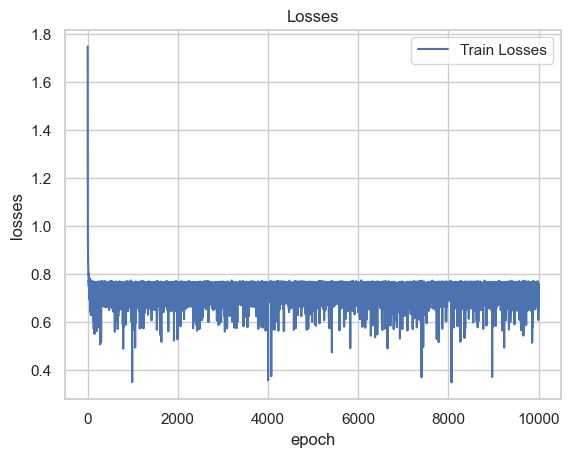

In [61]:
# Plotting the loss graph of the best model
print("-" * 20)
print("Best Model:")
print(f"Regularization: {best_reg_name}")
print(f"Method: {best_method}")
print(f"Final Training Loss: {best_train_loss}")
print("-" * 20)
best_model.plot()
plt.show()

In [62]:
# Predicting on the X_test
yhat = best_model.predict(X_test)

# Custom classification report
custom_classification_report = best_model.classification_report(y_test, yhat)
print("#" * 10, "Custom-coded Classification report", "#" * 10)
print(custom_classification_report)

# Sklearn's classification report
sklearn_report = classification_report(y_test, yhat)
print("\n")
print("#" * 10, "Sklearn Classification report", "#" * 10)
print(sklearn_report)

########## Custom-coded Classification report ##########
             precision recall  f1-score
0                 0.55   0.66      0.60
1                 0.63    0.5      0.56
2                 0.67   0.74      0.70
3                 0.77   0.74      0.75
accuracy                           0.68
macro avg         0.66   0.66      0.66
weighted avg      0.68   0.68      0.67


########## Sklearn Classification report ##########
              precision    recall  f1-score   support

           0       0.55      0.66      0.60       152
           1       0.63      0.50      0.56       307
           2       0.67      0.74      0.70       517
           3       0.77      0.74      0.75       386

    accuracy                           0.68      1362
   macro avg       0.66      0.66      0.66      1362
weighted avg       0.68      0.68      0.67      1362



**Confusion Matrix**

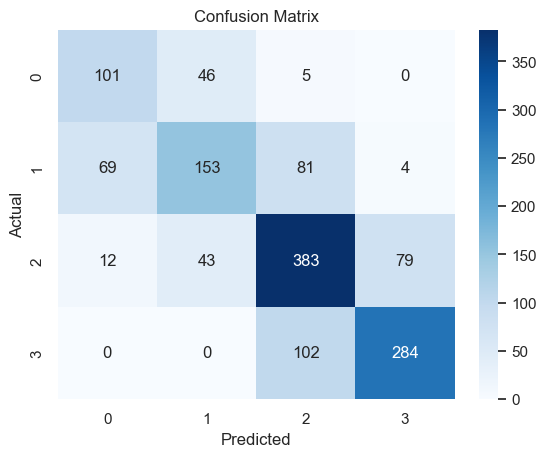

In [63]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, yhat)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Testing
Testing registererd model at MLFlow

In [62]:
import joblib

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [63]:
# Loading registered model from mlflow server

model_name = "st125001-a3"
model_version = 1

model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/{model_version}")

## Inference

In [1551]:
['year', 'engine', 'max_power', 'mileage', 'owner']
scale_columns = ['year', 'engine', 'max_power', 'mileage']

In [64]:
# Assuming 'df' is your loaded DataFrame and 'scaler' is the StandardScaler used during training
from sklearn.preprocessing import StandardScaler

# Select the columns that need scaling
columns_to_scale = ['year', 'engine', 'max_power', 'mileage']
unscaled_column = ['owner']

# Filter the DataFrame
df_scaled = df[columns_to_scale]
df_unscaled = df[unscaled_column]

# Apply the same scaler that was used during training
df_scaled_transformed = scaler.transform(df_scaled)

# Convert the scaled array back to a DataFrame to match the original structure
df_scaled_transformed = pd.DataFrame(df_scaled_transformed, columns=columns_to_scale)

# Concatenate the scaled and unscaled parts of the DataFrame
df_preprocessed = pd.concat([df_scaled_transformed, df_unscaled.reset_index(drop=True)], axis=1)

In [65]:
# Assuming 'model' is your trained logistic regression model
predictions = model.predict(df_preprocessed)

# Add predictions back to the original DataFrame
df['predicted_price'] = predictions

# Output the DataFrame with predictions
print(df[['year', 'engine', 'max_power', 'mileage', 'owner', 'predicted_price']].head())

   year  engine  max_power  mileage  owner  predicted_price
0  2014  1248.0      74.00    23.40      1                2
1  2014  1498.0     103.52    21.14      2                2
2  2006  1497.0      78.00    17.70      3                0
3  2010  1396.0      90.00    23.00      1                0
4  2007  1298.0      88.20    16.10      1                0


In [1554]:
df.head()

,brand,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,fuel_Diesel,fuel_Petrol,selling_price_labels
0,Maruti,2014,450000,145500,1,23.40,1248.0,74.00,5.0,0,1,0,0,1,1,0,2
1,Skoda,2014,370000,120000,2,21.14,1498.0,103.52,5.0,0,1,0,0,1,1,0,2
2,Honda,2006,158000,140000,3,17.70,1497.0,78.00,5.0,0,1,0,0,1,0,1,1
3,Hyundai,2010,225000,127000,1,23.00,1396.0,90.00,5.0,0,1,0,0,1,1,0,1
4,Maruti,2007,130000,120000,1,16.10,1298.0,88.20,5.0,0,1,0,0,1,0,1,0


## Importing Models from Brainlab hosted MLFLOW Server

In [ ]:
import mlflow
import os
from mlflow import pyfunc
os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'password'

# Set up your MLflow tracking URI and load the model
mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th")
model_name = "st125001-a3"
model_version = 1  

# Load the model from MLflow
model_a3 = mlflow.pyfunc.load_model(f"models:/{model_name}/{model_version}")

# Get the model signature
model_info = mlflow.get_model(f"models:/{model_name}/{model_version}")
print(model_info.signature)

In [ ]:
import mlflow
from mlflow import pyfunc

# Set up your MLflow tracking URI
mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th")

model_name = "st125001-a3"
model_version = 1  

# Load the model
model_a3 = mlflow.pyfunc.load_model(f"models:/{model_name}/{model_version}")

# Get model version details
client = mlflow.tracking.MlflowClient()
model_version_info = client.get_model_version(model_name, model_version)

# Print out the model version information
print("Model Version Info:")
print(f"Name: {model_version_info.name}")
print(f"Version: {model_version_info.version}")
print(f"Source: {model_version_info.source}")
print(f"Signature: {model_version_info.signature}")  # If this was logged during registration


In [ ]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
model_name = "st125001-a3"
model_version = 1

# Get the model version information
model_version_info = client.get_model_version(model_name, model_version)

# Retrieve the model's artifacts (including the signature)
model_uri = f"models:/{model_name}/{model_version}"
model_metadata = client.get_registered_model(model_name)

# This retrieves the model signature from the artifact path
model_details = client.get_model_version(model_name, model_version)

# Load the model
loaded_model = mlflow.pyfunc.load_model(model_uri)

# Now, check the signature
if hasattr(loaded_model, "signature"):
    print("Signature found:")
    print(loaded_model.signature)
else:
    print("No signature found for this model.")
